### Part 1: Gradient Descent + Example


<div style="text-align: right; direction: rtl; line-height:3;"  dir="rtl">

<br> الگوریتم گرادیان کاهشی یک الگوریتم بهینه‌سازی‌ است که برای بهینه‌سازی توابع مشتق‌پذیر استفاده می‌شود.
<br> این الگوریتم معمولا در هر مرحله در جهت معکوس گرادیان تابع هدف حرکت می‌کند تا به نقطه‌ای برسد که گرادیان تابع هدف در آن نقطه صفر شود.
<br> این الگوریتم برای بهینه‌سازی توابع مشتق‌پذیر استفاده می‌شود و می‌تواند بهینه‌سازی توابع غیرخطی را انجام دهد.
<br> در یادگیری‌ماشین این الگوریتم اصولا برای بهینه‌سازی توابع هزینه (که همان اختلاف بین خروجی مدل و خروجی واقعی است.) استفاده می‌شود.
<br> فرمول گرادیان کاهشی به صورت زیر است:
<br> $w = w - \alpha \nabla Q(w)$
<br> که در این فرمول $w$ وزن‌های مدل، $\alpha$ نرخ یادگیری و $\nabla Q(w)$ گرادیان تابع هزینه است.
<br> در این قسمت یک مثال ساده از الگوریتم گرادیان کاهشی ارائه شده است.
<br> فرض کنید یک مدل خطی به‌صورت زیر داریم و می‌خواهیم تتا را به‌روزرسانی کنیم به‌گونه‌ای که خط مدل بهترین تطابق را با داده‌ها داشته باشد.
<br> به‌عبارتی دیگر می‌خواهیم تتا را به‌گونه‌ای به‌روزرسانی کنیم که مقدار تابع هزینه کمینه شود.
<br> $y = \theta x $
<br> فرض می‌کنیم حدس اولیه ما برای تتا برابر ۳ بوده و نقاط داده‌ای ما به‌صورت زیر است:
<br> $X = [1, 2, 3, 4]$
<br> $Y = [2, 4, 6, 8]$
<br> در این مثال ما می‌خواهیم تتا را به‌روزرسانی کنیم به‌گونه‌ای که خطی که از این تتا به‌دست می‌آید بهترین تطابق را با داده‌ها داشته باشد.
<br> برای این‌کار ابتدا تابع هزینه را تعریف می‌کنیم:
<br> $Q = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \theta x_i)^2$
<br> سپس گرادیان تابع هزینه را محاسبه می‌کنیم:
<br> $\nabla Q = \frac{-1}{n} \sum_{i=1}^{n} (y_i - \theta x_i) x_i$
<br> در نهایت تتا را به‌روزرسانی می‌کنیم:
<br> $\theta = \theta - \alpha \nabla Q$
<br> در این مثال مقدار $\alpha$ را برابر 0.01 در نظر می‌گیریم و یکبار این کار را تکرار می‌کنیم.
<br> میدانیم در عمل تعداد تکرار ها بیش‌تر است.
<br> در این مثال مقدار گرادیان برابر:
<br> $\nabla Q = \frac{-1}{4} \sum_{i=1}^{4} (y_i - \theta x_i) x_i = \frac{-1}{4} \sum_{i=1}^{4} (y_i - 3 x_i) x_i$
<br> $= \frac{-1}{4} \sum_{i=1}^{4} (y_i x_i - 3 x_i^2) = \frac{-1}{4} \sum_{i=1}^{4} (2 x_i^2 - 3 x_i^2)$
<br> $= \frac{-1}{4} \sum_{i=1}^{4} - x_i^2 = \frac{1}{4} \sum_{i=1}^{4} x_i^2$
<br> $= \frac{1}{4} (1 + 4 + 9 + 16) = \frac{1}{4} \times 30 = 7.5$
<br> پس مقدار جدید تتا برابر است با
<br> $\theta = 3 - 0.01 \times 7.5 = 3 - 0.075 = 2.925$
<br> در این‌جا مقدار جدید تتا برابر 2.925 است.
<br> یعنی به مقدار بهینه نزدیک‌تر شدیم.
<br> با تکرار این کار مقدار تتا به مقدار بهینه 2 نزدیک‌تر می‌شود.


</div>


In [12]:
import pandas as pd 
import numpy as np
import tqdm
import matplotlib.pyplot as plt

#### Reading Data

In [13]:
df = pd.read_csv('../data/1.csv')

##  Polynomial Regression

<div style="text-align: right; direction: rtl; line-height:3;">


####  مدل رگرسیون چندجمله‌ای
در این بخش می‌خواهیم یک مدل رگرسیون چندجمله‌ای ارائه دهیم که بتواند داده‌های غیرخطی را نیز تخمین بزند
برای این‌کار ابتدا یک مدل خطی ارائه می‌دهیم که به‌صورت زیر است

$y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n$

سپس این مدل را به‌گونه‌ای تغییر می‌دهیم که بتواند داده‌های غیرخطی را نیز تخمین بزند
برای این‌کار ابتدا تمامی توان‌های ممکن برای هر یک از ویژگی‌ها را محاسبه می‌کنیم
سپس تمامی ترکیب‌های ممکن از این توان‌ها را محاسبه می‌کنیم می‌توانیم این کار را به‌صورت بازگشتی انجام دهیم و تمامی ترکیب‌های ممکن از توان‌ها را به‌دست آوریم می‌دانیم اگر تعداد ویژگی‌ها $n$ باشد و مجموع توان‌ها $m$ باشد تعداد ترکیب‌های ممکن یکتا از توان‌ها برابر است با (مسئله میله‌ها و ستاره‌ها)
 

$\binom{n+m-1}{m - 1}$

سپس ویژگی‌های جدیدی که از ترکیب‌های مختلف توان‌ها به‌دست می‌آید را به‌عنوان ویژگی‌های جدید به مدل خطی اضافه می‌کنیم
در نهایت مدل خطی جدیدی که از این‌جا به‌دست می‌آید مدل رگرسیون چندجمله‌ای است

به‌طور مثال اگر تعداد ویژگی‌ها ۲ باشد و می‌خواهیم توان‌ها تا ۳ را در نظر بگیریم تعداد ترکیب‌های ممکن برابر است با (یک واحد به تعداد ویژگی‌ها اضافه می‌کنیم برای بایاس)

$\binom{3+3-1}{3 - 1} = \binom{5}{2} = 10$

و ترکیب‌های ممکن از توان‌ها به‌صورت زیر است

$[0, 0], [0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [3, 0]$

و ویژگی‌های جدیدی که به‌دست می‌آید به‌صورت زیر است

$[1, x_1, x_2, x_1^2, x_1 x_2, x_2^2, x_1^3, x_1^2 x_2, x_1 x_2^2, x_2^3]$


#### مدل رگرسیون خطی
در این مدل از الگوریتم گرادیان کاهشی برای بهینه‌سازی استفاده می‌کنیم و می‌توانیم مدل رگرسیون خطی را به‌صورت زیر ارائه دهیم

$y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n$

این مدل را می‌توان به‌صورت ماتریسی زیر نوشت

$\hat{y} = X w$

که در این‌جا $X$ ماتریس ویژگی‌ها و $w$ وزن‌های مدل است

خطای مدل را می‌توان به‌صورت زیر نوشت

$ e = X w - y $

در اینجا $e$ خطای مدل و $y$ خروجی واقعی است

تابع هزینه را به‌صورت ماتریسی می‌توان به‌صورت زیر نوشت

$Q = \frac{1}{2n} e^T e$

که در این‌جا $n$ تعداد نمونه‌ها است

گرادیان تابع هزینه را می‌توان به‌صورت زیر نوشت

$\nabla Q = \frac{1}{n} X^T e$

بدین‌ترتیب وزن‌هارا به‌صورت زیر به‌روزرسانی می‌کنیم 

$w = w - \alpha \nabla Q$

که در این‌جا $\alpha$ نرخ یادگیری است
از رگولاریزیشن $l_1$ برای جلوگیری از بیش‌برازش استفاده می‌کنیم که به‌صورت زیر است

$w = w - \alpha \nabla Q + \lambda \text{sign}(w)$

که در این‌جا $\lambda$ ضریب رگولاریزیشن است

در نهایت مدل را به‌صورت زیر به‌روزرسانی می‌کنیم

$w = w - \alpha \nabla Q + \lambda \text{sign}(w)$

با تکرار این کار مدل بهینه می‌شود

از امتیازدهی $R^2$ برای ارزیابی مدل استفاده می‌کنیم که به‌صورت زیر است
$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$


</div>

In [132]:
class MyLinearRegression:
    def __init__(self):
        self.w = None
        
    def fit(self, X: np.ndarray, y: np.array, epochs=100, learning_rate=0.01, lamb=0.01, gd = True):
        rows, cols = X.shape
        if not gd:
            self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        else:
            self.w = np.zeros(cols)
            for _ in tqdm.tqdm(range(epochs)):
                predicts = X @ self.w
                errors = (predicts - y)
                reg = lamb * np.sign(self.w)
                reg[0] = 0
                gradient = X.T @ errors / rows + reg
                update_term = learning_rate  *  gradient
                print(update_term)
                self.w -= update_term
                
            
        
    def predict(self, X: np.ndarray):
        return X @ self.w

    def score(self, X: np.ndarray, y: np.array):
        y_pred = self.predict(X)

        ss_res = np.sum(np.square(y - y_pred), dtype=np.float64)
        ss_tot = np.sum(np.square(y - np.mean(y)), dtype=np.float64)
    
        if ss_tot == 0:
            return 0.0  # or np.nan, depending on how you want to handle this case
    
        r2 = 1 - (ss_res / ss_tot)
        
        return r2
    
    
    def rmse(self, X: np.ndarray, y: np.array):
        y_pred = self.predict(X)
        return np.sqrt(np.mean((y - y_pred) ** 2))
    
        


class PolynomialRegression: 
    def __init__(self, degree=2, epochs = 100):
        self.degree = degree
        self.epochs = epochs
        self.powers = None
        self.lr = MyLinearRegression()
    
    def fit(self, X: np.ndarray, y: np.array, epochs=100, learning_rate=0.01, gd = True):
        X = self.add_bias(X)
        self.powers = self.get_power_combinations(X.shape[1], self.degree)
        X = self.get_pr_features(X, self.powers)
        self.lr.fit(X, y, epochs=epochs, learning_rate=learning_rate, gd=gd)
        
    def score(self, X: np.ndarray, y: np.array):
        X = self.add_bias(X)
        X = self.get_pr_features(X, self.powers)
        return self.lr.score(X, y)
    
    def rmse(self, X: np.ndarray, y: np.array):
        X = self.add_bias(X)
        X = self.get_pr_features(X, self.powers)
        return self.lr.rmse(X, y)
    
    
    
    def predict(self, X: np.ndarray):
        X = self.add_bias(X)
        X = self.get_pr_features(X, self.powers)
        return X @ self.lr.w
        
    def add_bias(self, X: np.ndarray): 
        return np.column_stack((np.ones(X.shape[0]) , X))
        
    
    def get_pr_features(self, X: np.ndarray, powers: np.ndarray = None):
        if powers is None:
            powers = self.get_power_combinations(X.shape[1], self.degree)
        return np.prod(np.power(X[:, np.newaxis], powers), axis=-1)


    def get_power_combinations(self, n: int, m: int): 
        if n == 1:
            return [[m]]
        if m == 0:
            return [[0 for _ in range(n)]]
        sols = []
        for i in range(m+1):
            for sol in self.get_power_combinations(n-1, m - i):
                sols.append(
                    [i] + sol
                )
        return sols

<div style="text-align: right; direction: rtl; line-height:3;">

#### توابع زیر را برای جداکردن داده‌ها به دو بخش آموزش و تست ارائه داده‌ایم


</div> 

In [133]:

def train_test_split_manual(df, test_size=0.2, random_state=None, shuffle=True):
    if shuffle:
        df = df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    if isinstance(test_size, float):
        test_size = int(len(df) * test_size)

    train_df = df.iloc[:-test_size].reset_index(drop=True)
    test_df = df.iloc[-test_size:].reset_index(drop=True)

    return train_df, test_df


In [134]:
NUMERICAL_FEATURES = [
    'Rooms', 'Distance', 'Bedroom2', 'Postcode', 'Bathroom', 'Car',
    'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount', 'Price'
]
CATEGORICAL_FEATURES = [
    'Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname', 'Date'
]
PREDICT = 'Price'

train, test = train_test_split_manual(df, test_size=.2, random_state=40, shuffle=True)

<div style="text-align: right; direction: rtl; line-height:3;">

#### توابع زیر را برای نرمال‌سازی و استاندارد‌سازی داده‌ها ارائه داده‌ایم

#### نرمال‌سازی داده‌ها به‌صورت زیر است

$X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$


#### استاندارد‌سازی داده‌ها به‌صورت زیر است

$X_{\text{std}} = \frac{X - \mu}{\sigma}$


</div>

In [135]:
def normalize_df(matrix: np.ndarray):
    return (matrix - matrix.min(axis=0)) / (matrix.max(axis=0) - matrix.min(axis=0))
def standardize_df(matrix: np.ndarray):
    return (matrix - matrix.mean(axis=0)) / matrix.std(axis=0)

In [136]:
from sklearn.impute import SimpleImputer

<div style="text-align: right; direction: rtl; line-height:3;">

### حذف داده‌های ناقص
#### در این مرحله داده‌های ناقص را حذف می‌کنیم و در مراحل بعد استانداردسازی و نرمال‌سازی را مقایسه می‌کنیم


</div> 

In [137]:
train = train.dropna()
test = test.dropna()

<div style="text-align: right; direction: rtl; line-height:3;">


### استاندارد سازی
#### ایتدا از استاندارد‌سازی داده‌ها استفاده می‌کنیم و مدل را با استفاده از گرادیان کاهشی آموزش می‌دهیم
#### سپس مدل را بر روی داده‌های تست ارزیابی می‌کنیم


</div>

In [138]:
train_numeric = standardize_df(train[NUMERICAL_FEATURES].values)
y = train[PREDICT].values
test_numeric = standardize_df(test[NUMERICAL_FEATURES].values)
y_test = test[PREDICT].values

In [139]:
pr1 = PolynomialRegression(degree=1)
pr1.fit(train_numeric, y, epochs=1000, learning_rate=.1, gd=True)
r2_std_1 = pr1.score(test_numeric, y_test)
rmse_std_1 = pr1.rmse(test_numeric, y_test)

r2_std_1, rmse_std_1

100%|██████████| 1000/1000 [00:00<00:00, 10394.34it/s]

[ -67351.99449463    3092.03178554  -14768.93387137   14099.26778455
   21545.99422893  -34549.64487178   -4629.55356887  -17417.4967019
  -34349.30428824   -9099.89821807  -35047.57676165    9880.73416156
  -36032.42489643 -106659.20643794]
[-51268.65132015   1380.2414739   -9591.85773128  10026.18568643
  17224.89872018 -20883.70075575  -2556.58079768  -9053.07711195
 -20685.19667613  -5287.16240457 -19677.27867382  11736.77115296
 -20464.88894255 -95993.28479415]
[-40423.90933926    420.42194189  -6271.91810986   7210.26166073
  13695.51739048 -12389.28831732  -1336.04269472  -4202.55075863
 -12243.60359726  -3012.91411947 -10330.53946922  11915.33348539
 -10971.15753861 -86393.95631473]
[-32935.16513891    -90.17567502  -4115.22688997   5216.36776641
  10799.36236209  -7099.89933414   -629.37583486  -1467.39642013
  -7026.4929038   -1671.53783362  -4690.4510231   11203.60339709
  -5218.79379844 -77754.56068326]
[-2.76221089e+04 -3.36328295e+02 -2.69146727e+03  3.76944491e+03
  8.41

(np.float64(0.9996008100304925), np.float64(13612.369962722834))

In [140]:
pr2 = PolynomialRegression(degree=2)
pr2.fit(train_numeric, y, epochs=1000, learning_rate=.1, gd=True)
r2_std_2 = pr2.score(test_numeric, y_test)
rmse_std_2 = pr2.rmse(test_numeric, y_test)

r2_std_2, rmse_std_2

  0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/yq/5ch5x8jn4qb69qx20g9_9lqr0000gn/T/ipykernel_62622/2141377499.py:12: RuntimeWarning: invalid value encountered in matmul
  predicts = X @ self.w
 30%|███       | 304/1000 [00:00<00:00, 3037.72it/s]

[-278230.43799243    1346.2366072   -89252.28033847  -40385.17418045
   -5106.78342549  -87060.09839319   41429.16942365   -2565.32004437
   31538.66535037  -91106.45446635   58149.15777051    1185.25251973
    -802.268995     -6312.70404988 -128612.52502106 -116210.75256501
    4975.6371168   -21784.05378019   13726.45860545    2767.82965858
 -173079.63650936  -21806.51957973    1660.34252444   -6655.02860418
    1085.62374899   -1516.38323712  -14245.47103452  -72434.11596494
  -59593.99237898    4077.45299317  -12327.75746998    6912.32942203
  -13237.55569727  -51483.36128396  -16354.03534467 -127281.29067087
 -118505.81226489    5927.08375415  -22409.20028685   17421.69119771
  -12455.81763723  -92392.0725359   -13787.48056683  -51304.64685485
 -157713.90962967  -32124.55970148   -6729.33837021  -42751.29689968
   47028.46892485    1788.03886892  -13775.37461541   -3169.75811661
   -6276.42684199  -17813.243201    -82441.05106009 -101596.51509533
    8920.25125282  -19925.64746293

100%|██████████| 1000/1000 [00:00<00:00, 3133.22it/s]

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan


(np.float64(nan), np.float64(nan))

In [97]:
pr3 = PolynomialRegression(degree=3)
pr3.fit(train_numeric, y, epochs=100, learning_rate=.01, gd=True)
pr3.score(test_numeric, y_test)

r2_std_3 = pr3.score(test_numeric, y_test)
rmse_std_3 = pr3.rmse(test_numeric, y_test)

r2_std_3, rmse_std_3

  0%|          | 0/100 [00:00<?, ?it/s]/var/folders/yq/5ch5x8jn4qb69qx20g9_9lqr0000gn/T/ipykernel_62622/693252086.py:12: RuntimeWarning: invalid value encountered in matmul
  predicts = X @ self.w
100%|██████████| 100/100 [00:00<00:00, 1528.16it/s]


(np.float64(nan), np.float64(nan))

<div style="text-align: right; direction: rtl; line-height:3;">

#### همانطور که مشاهده می‌شود وقتی از استادندارسازی استفاده می‌کنیم،
#### با افزایش درجه مدل امتیاز آن به‌طرز شدیدی کاهش می‌یابد
#### به‌طوری‌که با افزایش درجه حتی منجر به اورفلو می‌شود
#### با این‌حساب وقتی استاندارد می‌کنیم نمی‌توانیم درجه‌هارا بیشتر کنیم چرا که
#### امتیاز مدل به‌طرز شدیدی کاهش می‌یابد یعنی برای مدل با ورودی‌های استاندارد شده
#### مدل با درجات بالاتر بهترین عملکرد را ندارد و بهترین عملکرد برای مدل با درجه 1 است
 

<div style="text-align: right; direction: rtl; line-height:3;">

### نرمال‌سازی
#### حال از نرمال‌سازی داده‌ها استفاده می‌کنیم و مدل را با استفاده از گرادیان کاهشی آموزش می‌دهیم

</div>


In [129]:
train_numeric = normalize_df(train[NUMERICAL_FEATURES].values)
y = train[PREDICT].values

test_numeric = normalize_df(test[NUMERICAL_FEATURES].values)
y_test = test[PREDICT].values

In [130]:
pr1 = PolynomialRegression(degree=1)
pr1.fit(train_numeric, y, epochs=1000, learning_rate=.1, gd=True)

r2_norm_1 = pr1.score(test_numeric, y_test)
rmse_norm_1 = pr1.rmse(test_numeric, y_test)

r2_norm_1, rmse_norm_1

100%|██████████| 1000/1000 [00:00<00:00, 26845.09it/s]


(np.float64(0.8290438951278043), np.float64(281699.6069350716))

In [131]:
pr2 = PolynomialRegression(degree=2)
pr2.fit(train_numeric, y, epochs=1000, learning_rate=.1, gd=True)

r2_norm_2 = pr2.score(test_numeric, y_test)
rmse_norm_2 = pr2.rmse(test_numeric, y_test)

r2_norm_2, rmse_norm_2

100%|██████████| 1000/1000 [00:00<00:00, 17330.40it/s]


(np.float64(0.8241017880307039), np.float64(285742.3725061619))

In [91]:
pr3 = PolynomialRegression(degree=3)
pr3.fit(train_numeric, y, epochs=1000, learning_rate=.1, gd=True)
sc3 = pr3.score(test_numeric, y_test)

r2_norm_3 = pr3.score(test_numeric, y_test)
rmse_norm_3 = pr3.rmse(test_numeric, y_test)

r2_norm_3, rmse_norm_3

100%|██████████| 1000/1000 [00:00<00:00, 1646.60it/s]


(np.float64(0.6203050517329325), np.float64(419818.2784985996))

In [105]:
pr4 = PolynomialRegression(degree=4)
pr4.fit(train_numeric, y, epochs=1000, learning_rate=.1, gd=True)

r2_norm_4 = pr4.score(test_numeric, y_test)
rmse_norm_4 = pr4.rmse(test_numeric, y_test)

r2_norm_4, rmse_norm_4

100%|██████████| 1000/1000 [00:07<00:00, 132.78it/s]


(np.float64(0.4068526813658677), np.float64(524717.1024453805))

<Figure size 2000x1000 with 0 Axes>

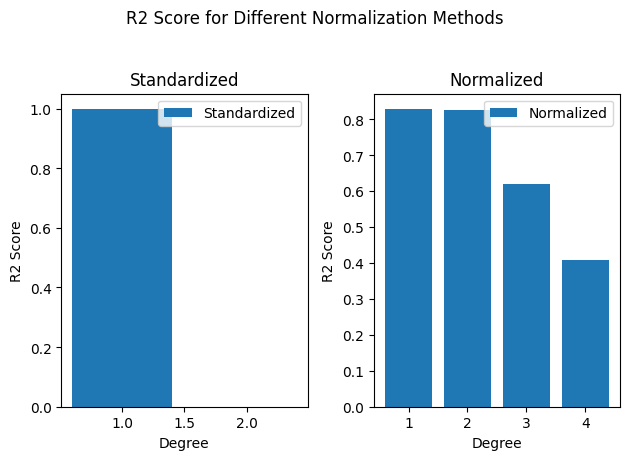

In [113]:
# Plot score for each degree each subplot is for one normalization method
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(1, 2)
ax[0].bar([1, 2], [r2_std_1, 0], label='Standardized')
ax[1].bar([1, 2, 3, 4], [r2_norm_1, r2_norm_2, r2_norm_3, r2_norm_4], label='Normalized')
ax[0].set_title('Standardized')
ax[1].set_title('Normalized')

ax[0].set_xlabel('Degree')
ax[1].set_xlabel('Degree')
ax[0].set_ylabel('R2 Score')
ax[1].set_ylabel('R2 Score')

ax[0].legend()
ax[1].legend()

fig.suptitle('R2 Score for Different Normalization Methods')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



<div style="text-align: right; direction: rtl; line-height:3;">


#### همانطور که مشاهده می‌شود وقتی از نرمال‌سازی استفاده می‌کنیم،
#### با افزایش درجه مدل امتیاز آن  افزایش می‌یابد
#### با این حساب وقتی نرمال می‌کنیم می‌توانیم درجه‌هارا بیشتر کنیم و مدل با درجات بالاتر را بررسی کنیم
#### به همین دلیل به‌نظر می‌رسد نرمال‌سازی برای این مجموعه داده مناسب‌تر است



In [124]:
from sklearn.linear_model import SGDRegressor
## scikit learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

train, test = train_test_split_manual(df, test_size=.2, random_state=40, shuffle=True)
train = train.dropna()
test = test.dropna()

X_train = train[NUMERICAL_FEATURES].values
y_train = train[PREDICT].values

X_test = test[NUMERICAL_FEATURES].values
y_test = test[PREDICT].values

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pr = PolynomialFeatures(degree=3)
sgd = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000)
X_train = pr.fit_transform(X_train)
X_test = pr.transform(X_test)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.92632225226537